In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("tempo-recife.csv", sep=";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766 entries, 0 to 1765
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Data Medicao                             1766 non-null   object 
 1   PRECIPITACAO TOTAL, DIARIO(mm)           1756 non-null   float64
 2   TEMPERATURA MAXIMA, DIARIA(°C)           1693 non-null   float64
 3   TEMPERATURA MINIMA, DIARIA(°C)           1756 non-null   float64
 4   UMIDADE RELATIVA DO AR, MEDIA DIARIA(%)  1686 non-null   float64
 5   VENTO, VELOCIDADE MEDIA DIARIA(m/s)      1761 non-null   float64
 6   Unnamed: 6                               0 non-null      float64
dtypes: float64(6), object(1)
memory usage: 96.7+ KB


In [4]:
df = df.drop("Unnamed: 6", axis=1)

## Visualização de Series Temporais

Visualização por index temporal

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

<AxesSubplot:>

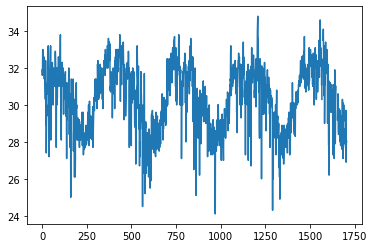

In [6]:
df["TEMPERATURA MAXIMA, DIARIA(°C)"].plot()

In [7]:
df.index = pd.to_datetime(df["Data Medicao"])

<AxesSubplot:xlabel='Data Medicao'>

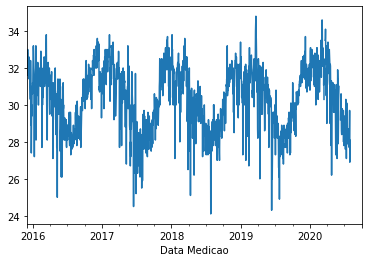

In [8]:
df["TEMPERATURA MAXIMA, DIARIA(°C)"].plot()

Recortes temporais

<AxesSubplot:xlabel='Data Medicao'>

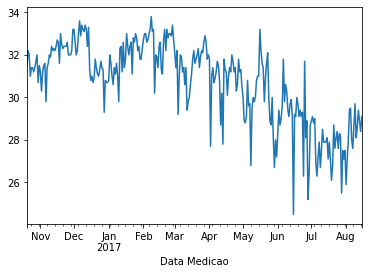

In [9]:
df[324:624]["TEMPERATURA MAXIMA, DIARIA(°C)"].plot()

<AxesSubplot:xlabel='Data Medicao'>

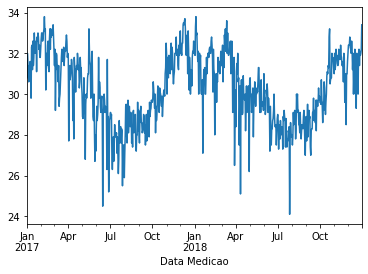

In [10]:
df["2017":"2018"]["TEMPERATURA MAXIMA, DIARIA(°C)"].plot()

<AxesSubplot:xlabel='Data Medicao'>

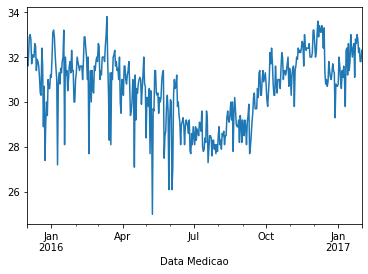

In [11]:
df[:"2017-01"]["TEMPERATURA MAXIMA, DIARIA(°C)"].plot()

Ajustes de tamanho de gráfico

In [12]:
matplotlib.rcParams['figure.figsize'] = [16, 6]

<AxesSubplot:xlabel='Data Medicao'>

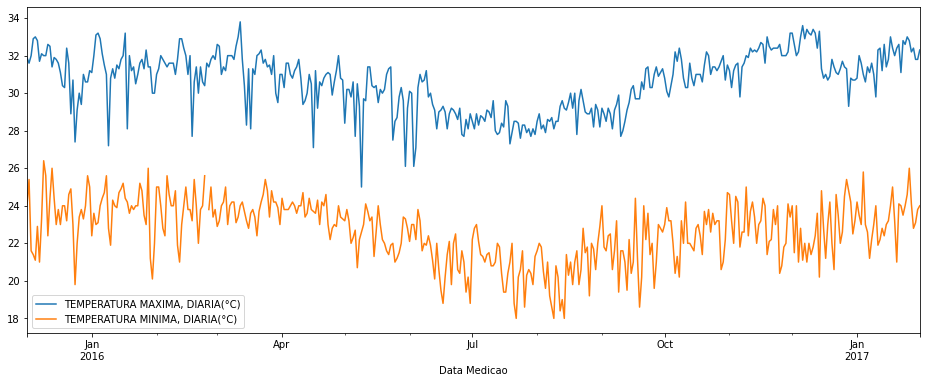

In [13]:
df[:"2017-01"][["TEMPERATURA MAXIMA, DIARIA(°C)", "TEMPERATURA MINIMA, DIARIA(°C)"]].plot()

df com dados mensais a partir de 1961

In [14]:
df_hist=pd.read_csv("tempo-historico-recife.csv", sep=";")
df_hist=df_hist.drop("Unnamed: 6", axis=1)
df_hist.index = pd.to_datetime(df_hist["Data Medicao"])

In [15]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 711 entries, 1961-07-31 to 2020-09-30
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Data Medicao                             711 non-null    object 
 1   PRECIPITACAO TOTAL, MENSAL(mm)           710 non-null    float64
 2   TEMPERATURA MAXIMA MEDIA, MENSAL(°C)     708 non-null    float64
 3   TEMPERATURA MINIMA MEDIA, MENSAL(°C)     710 non-null    float64
 4   UMIDADE RELATIVA DO AR, MEDIA MENSAL(%)  706 non-null    float64
 5   VENTO, VELOCIDADE MEDIA MENSAL(m/s)      641 non-null    float64
dtypes: float64(5), object(1)
memory usage: 38.9+ KB


<AxesSubplot:xlabel='Data Medicao'>

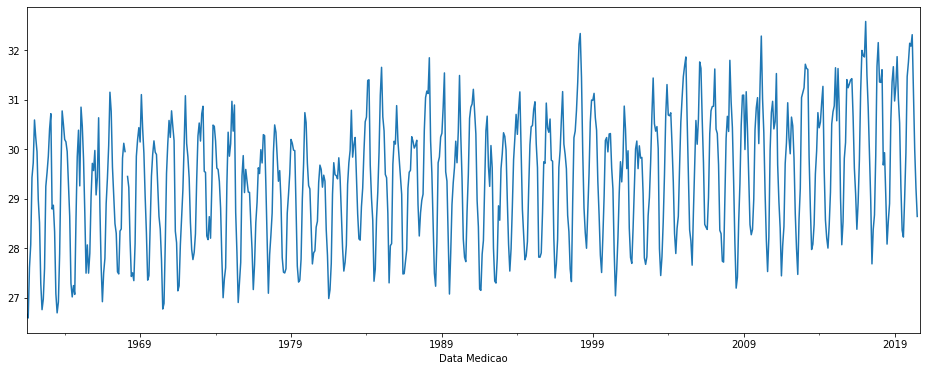

In [16]:
df_hist["TEMPERATURA MAXIMA MEDIA, MENSAL(°C)"].plot()

<AxesSubplot:xlabel='Data Medicao'>

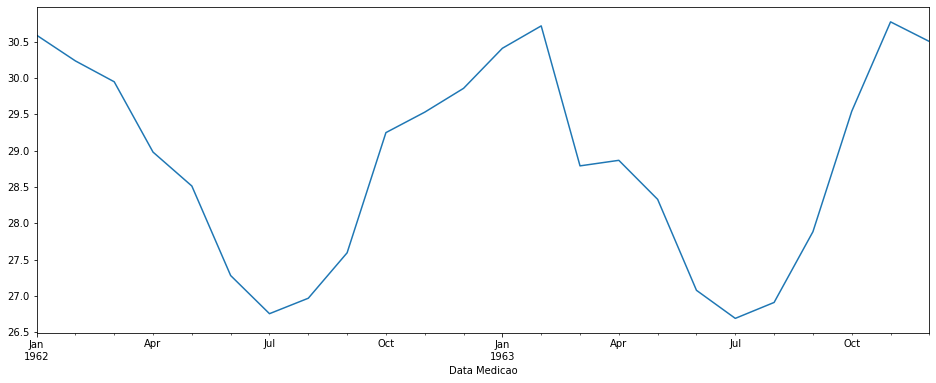

In [17]:
df_hist["1962":"1963"]["TEMPERATURA MAXIMA MEDIA, MENSAL(°C)"].plot()

<AxesSubplot:xlabel='Data Medicao'>

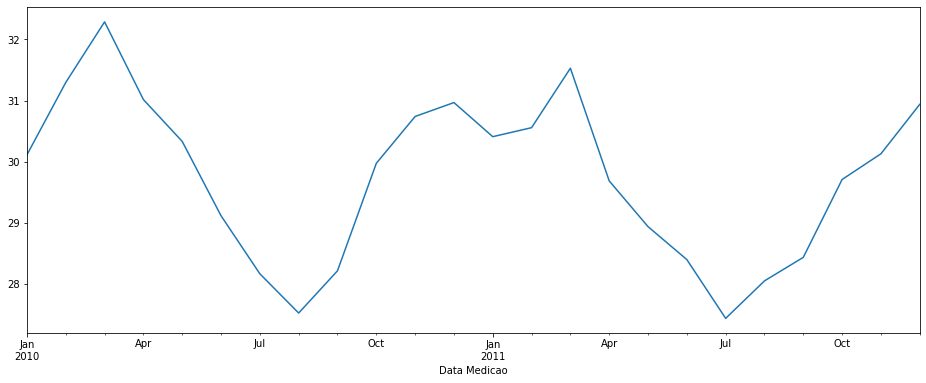

In [18]:
df_hist["2010":"2011"]["TEMPERATURA MAXIMA MEDIA, MENSAL(°C)"].plot()

## Aplicação de modelos para detalhamento de serie temporal

Separação de componentes temporais

In [19]:
import statsmodels.api as sm
import statsmodels

In [20]:
train = df_hist["1961":"2018"]

ARIMA model

/usr/local/Cellar/jupyterlab/3.4.5/libexec/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/Cellar/jupyterlab/3.4.5/libexec/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/Cellar/jupyterlab/3.4.5/libexec/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                         
Dep. Variable:     TEMPERATURA MAXIMA MEDIA, MENSAL(°C)   No. Observations:                  690
Model:                                            ARIMA   Log Likelihood               -1138.729
Date:                                  Tue, 13 Dec 2022   AIC                           2281.458
Time:                                          06:50:27   BIC                           2290.531
Sample:                                      07-31-1961   HQIC                          2284.967
                                           - 12-31-2018                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.3761      0.048    609.359      0.000      29.282

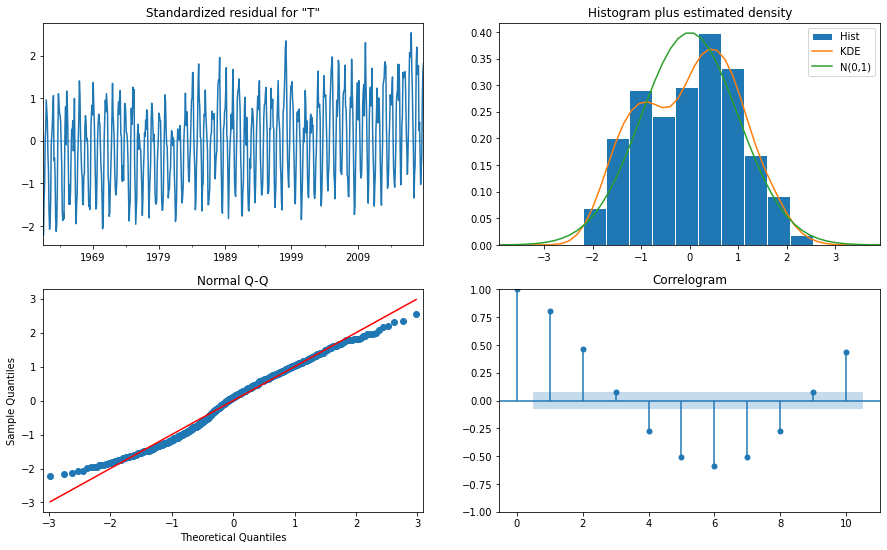

In [21]:
mod = sm.tsa.arima.ARIMA(train["TEMPERATURA MAXIMA MEDIA, MENSAL(°C)"])
res = mod.fit()
print(res.summary())
fig = res.plot_diagnostics(figsize=(15,9))
#fig = res.plot_predict(figsize=(15,9));

uso de Unobserved Components

/usr/local/Cellar/jupyterlab/3.4.5/libexec/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/Cellar/jupyterlab/3.4.5/libexec/lib/python3.10/site-packages/statsmodels/tsa/statespace/structural.py:1738: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


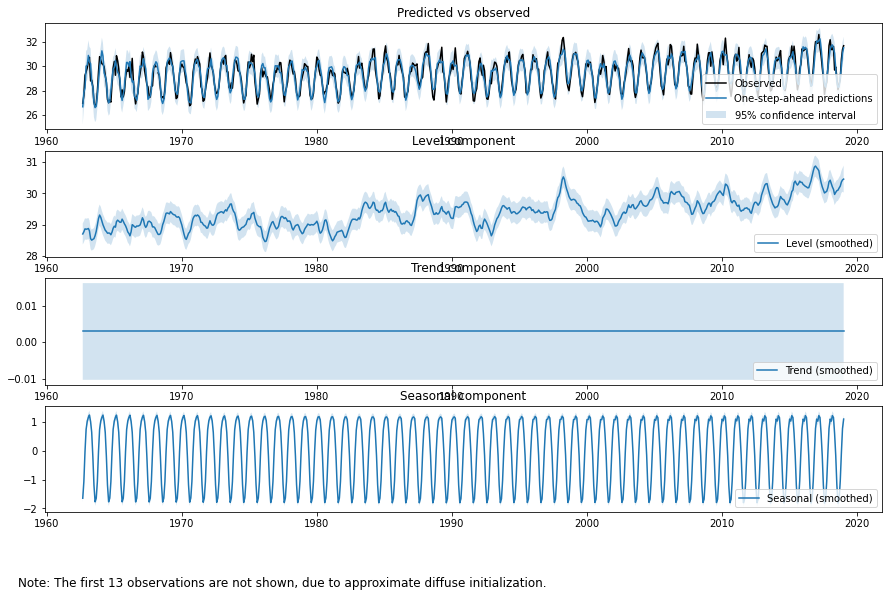

In [22]:
mod = sm.tsa.UnobservedComponents(
    train["TEMPERATURA MAXIMA MEDIA, MENSAL(°C)"], 
    level= "local linear trend",
    seasonal= 12
)
res = mod.fit(method='powell', disp=False)
fig = res.plot_components(figsize=(15,9), legend_loc="lower right");